# Artificial Neural Network for Wine Quality Classification
## 5CS037 - Programming Exercise

---

## Exercise 1 - Predicting Wine Quality using MLP

**Objective:** Build, train, and evaluate a Multi-Layer Perceptron (MLP) neural network to classify wine quality based on physicochemical properties.

## Part 1: Data Preparation

### 1.1 Load and Explore the Dataset

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.datasets import load_wine

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Load the wine dataset from sklearn
wine = load_wine()

# Create a DataFrame for better visualization
dataset_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
dataset_wine['target'] = wine.target

# Display basic information
print("Dataset Information:")
print("=" * 50)
print(f"Dataset shape: {dataset_wine.shape}")
print(f"\nFeature names: {list(wine.feature_names)}")
print(f"\nTarget names: {list(wine.target_names)}")
print("\nFirst 5 rows:")
print(dataset_wine.head())

# Statistical summary
print("\nStatistical Summary:")
print(dataset_wine.describe())

Dataset Information:
Dataset shape: (178, 14)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target names: [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76   

Target Distribution:
target
0    59
1    71
2    48
Name: count, dtype: int64

Class names: ['class_0' 'class_1' 'class_2']


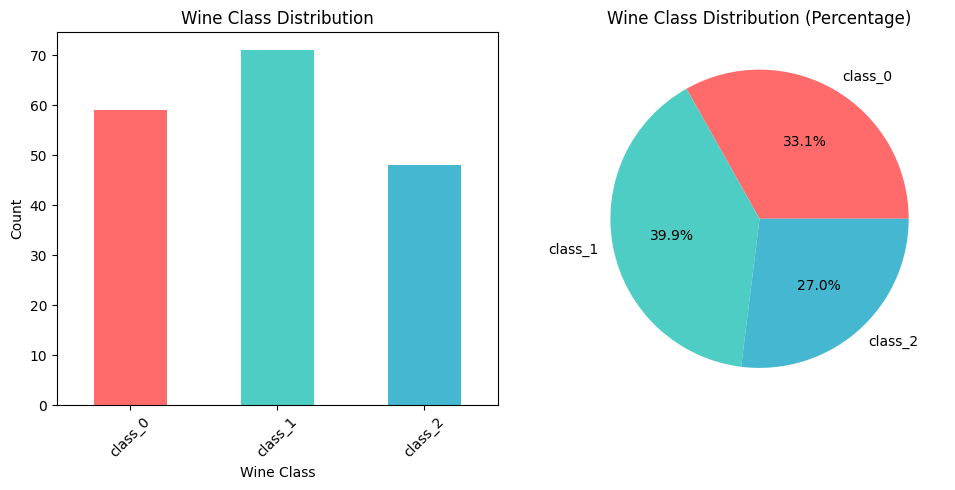

In [32]:
# Explore target distribution
print("Target Distribution:")
print("=" * 50)
print(dataset_wine['target'].value_counts().sort_index())
print(f"\nClass names: {wine.target_names}")

# Visualize target distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
dataset_wine['target'].value_counts().sort_index().plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Wine Class Distribution')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], wine.target_names, rotation=45)

plt.subplot(1, 2, 2)
plt.pie(dataset_wine['target'].value_counts().sort_index(),
        labels=wine.target_names,
        autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Wine Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

In [33]:
# Check for missing values
print("Missing Values Check:")
print("=" * 50)
missing_values = dataset_wine.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Missing Values Check:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Total missing values: 0


### **Answers to Questions 1-4:**

**1. How many samples and features does the dataset contain?**
   - The dataset contains **178 samples** and **13 features** (plus 1 target column)
   - Features include: alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, and proline

**2. What are the different wine classes (targets) and their distribution?**
   - There are **3 wine classes** (0, 1, 2)
   - Distribution:
     - Class 0: 59 samples (33.1%)
     - Class 1: 71 samples (39.9%)
     - Class 2: 48 samples (27.0%)
   - The dataset is relatively balanced with class 1 being slightly more represented

**3. Are there any missing values in the dataset?**
   - **No**, there are no missing values in the dataset. All features have complete data for all 178 samples.

**4. What are the names of the three wine classes?**
   - Class 0: **class_0**
   - Class 1: **class_1**
   - Class 2: **class_2**
   - These represent different cultivars of wine from the same region in Italy

### 1.2 Data Preprocessing: Data Splitting and Scaling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = wine.data  # Features (13 physicochemical properties)
y = wine.target  # Target (wine class: 0, 1, or 2)

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Split the data into training (80%) and testing (20%) sets
# Use random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y          # Maintain class distribution
)

print("\nData Split:")
print("=" * 50)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Check class distribution in splits
print("\nClass distribution in training set:")
unique, counts = np.unique(y_train, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} samples ({count/len(y_train)*100:.1f}%)")

print("\nClass distribution in testing set:")
unique, counts = np.unique(y_test, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} samples ({count/len(y_test)*100:.1f}%)")

Feature matrix shape: (178, 13)
Target vector shape: (178,)

Data Split:
Training set: 142 samples (79.8%)
Testing set: 36 samples (20.2%)

Class distribution in training set:
  Class 0: 47 samples (33.1%)
  Class 1: 57 samples (40.1%)
  Class 2: 38 samples (26.8%)

Class distribution in testing set:
  Class 0: 12 samples (33.3%)
  Class 1: 14 samples (38.9%)
  Class 2: 10 samples (27.8%)


In [35]:
# Initialize a StandardScaler and fit it on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)        # Only transform testing data

print("Scaling Information:")
print("=" * 50)
print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)
print("\nScaler mean (per feature):", scaler.mean_)
print("\nScaler scale (per feature):", scaler.scale_)

# Verify scaling - check mean and std of scaled training data
print("\nVerification of Scaling (Training Set):")
print(f"Mean of scaled features: {X_train_scaled.mean(axis=0).round(10)}")
print(f"Std of scaled features: {X_train_scaled.std(axis=0).round(2)}")

Scaling Information:
Training set shape: (142, 13)
Testing set shape: (36, 13)

Scaler mean (per feature): [1.29714789e+01 2.34000000e+00 2.36485915e+00 1.96253521e+01
 9.96338028e+01 2.27373239e+00 1.98535211e+00 3.60140845e-01
 1.60021127e+00 4.98964788e+00 9.48985915e-01 2.60619718e+00
 7.39478873e+02]

Scaler scale (per feature): [7.99690034e-01 1.09740026e+00 2.67433646e-01 3.36892252e+00
 1.48847587e+01 6.19261952e-01 9.48593965e-01 1.18790773e-01
 5.77731684e-01 2.32671090e+00 2.25847231e-01 6.87217017e-01
 3.00435522e+02]

Verification of Scaling (Training Set):
Mean of scaled features: [ 0. -0.  0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.]
Std of scaled features: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/tmp/ipython-input-3085660453.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(X_train[:, :5], labels=wine.feature_names[:5])
/tmp/ipython-input-3085660453.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(X_train_scaled[:, :5], labels=wine.feature_names[:5])


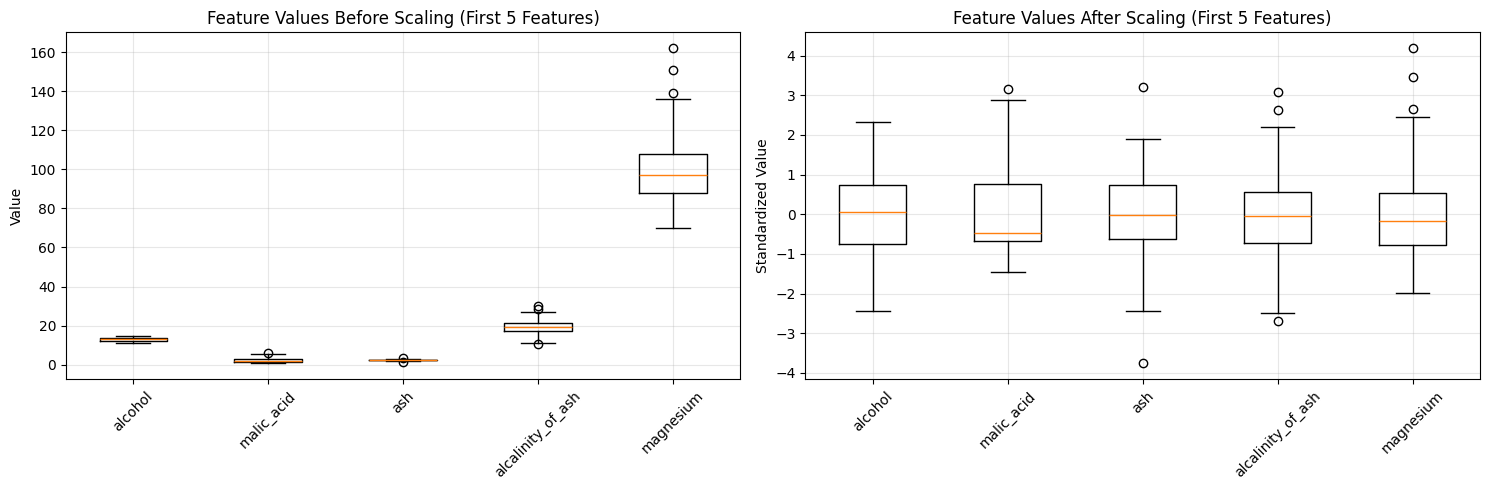

In [36]:
# Visualize the effect of scaling
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Before scaling - first 5 features
axes[0].boxplot(X_train[:, :5], labels=wine.feature_names[:5])
axes[0].set_title('Feature Values Before Scaling (First 5 Features)')
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# After scaling - first 5 features
axes[1].boxplot(X_train_scaled[:, :5], labels=wine.feature_names[:5])
axes[1].set_title('Feature Values After Scaling (First 5 Features)')
axes[1].set_ylabel('Standardized Value')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### **Answers to Questions 5-8:**

**5. Why do we split the data before scaling?**
   - We split the data before scaling to **prevent data leakage** from the test set into the training process
   - If we scaled before splitting, information from the test set (like mean and standard deviation) would influence the scaling parameters
   - This would give us an overly optimistic estimate of model performance because the model would have indirect access to test set statistics
   - The proper workflow is: Split first → Fit scaler on training data only → Transform both sets

**6. Why should we fit the scaler only on training data?**
   - Fitting the scaler only on training data ensures the **test set remains truly unseen**
   - The scaler learns the mean and standard deviation from the training data, which represents what the model will see during real-world deployment
   - If we fit on the entire dataset or test set, we would be using information from data the model hasn't seen, which violates the principle of honest evaluation
   - We then use these same parameters (from training) to transform the test set, simulating how the model would handle new, unseen data

**7. What is the purpose of using random_state?**
   - The `random_state` parameter ensures **reproducibility** of results
   - It seeds the random number generator so that the data split is identical every time we run the code
   - This is crucial for:
     - Debugging (we can reproduce errors)
     - Comparing different models fairly (same train/test split)
     - Scientific reproducibility (others can replicate our results)
     - Consistent grading and evaluation

**8. What do the scaler's mean_ and scale_ attributes represent?**
   - **`mean_`**: The mean value of each feature in the training set (shape: 13,)
     - Used to center the data: `(x - mean)`
   - **`scale_`**: The standard deviation of each feature in the training set (shape: 13,)
     - Used to normalize the variance: `(x - mean) / scale`
   - Together, they transform features to have mean=0 and standard deviation=1
   - These values are learned from training data and applied to both training and test sets

## Part 2: Model Definition and Training

### Task 2.1: Create and Configure MLP Model

In [37]:
from sklearn.neural_network import MLPClassifier

# Create an MLP classifier with specified architecture
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),  # Two hidden layers: 50 neurons in first, 25 in second
    activation='relu',             # ReLU activation function
    solver='adam',                 # Adam optimizer
    max_iter=500,                  # Maximum 500 iterations
    random_state=42,               # For reproducibility
    verbose=False                  # Don't print progress messages
)

print("MLP Model Configuration:")
print("=" * 50)
print(f"Model architecture: {mlp.hidden_layer_sizes}")
print(f"  - Input layer: {X_train.shape[1]} neurons (number of features)")
print(f"  - Hidden layer 1: {mlp.hidden_layer_sizes[0]} neurons")
print(f"  - Hidden layer 2: {mlp.hidden_layer_sizes[1]} neurons")
print(f"  - Output layer: {len(np.unique(y))} neurons (number of classes)")
print(f"\nActivation function: {mlp.activation}")
print(f"Solver (optimizer): {mlp.solver}")
print(f"Maximum iterations: {mlp.max_iter}")
print(f"Random state: {mlp.random_state}")

# Calculate total number of parameters
input_size = X_train.shape[1]
hidden1 = mlp.hidden_layer_sizes[0]
hidden2 = mlp.hidden_layer_sizes[1]
output_size = len(np.unique(y))

params_layer1 = (input_size * hidden1) + hidden1  # weights + biases
params_layer2 = (hidden1 * hidden2) + hidden2
params_output = (hidden2 * output_size) + output_size
total_params = params_layer1 + params_layer2 + params_output

print(f"\nTotal trainable parameters: {total_params}")
print(f"  - Layer 1 (13 → 50): {params_layer1} parameters")
print(f"  - Layer 2 (50 → 25): {params_layer2} parameters")
print(f"  - Output (25 → 3): {params_output} parameters")

MLP Model Configuration:
Model architecture: (50, 25)
  - Input layer: 13 neurons (number of features)
  - Hidden layer 1: 50 neurons
  - Hidden layer 2: 25 neurons
  - Output layer: 3 neurons (number of classes)

Activation function: relu
Solver (optimizer): adam
Maximum iterations: 500
Random state: 42

Total trainable parameters: 2053
  - Layer 1 (13 → 50): 700 parameters
  - Layer 2 (50 → 25): 1275 parameters
  - Output (25 → 3): 78 parameters


### Task 2.2: Train the Model

In [38]:
# Train the model using the scaled training data
print("Training the MLP model...")
print("=" * 50)

mlp.fit(X_train_scaled, y_train)

print("\nTraining Results:")
print("=" * 50)
print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final training loss: {mlp.loss_:.4f}")
print(f"Training set accuracy: {mlp.score(X_train_scaled, y_train):.4f}")

# Check if model converged
if mlp.n_iter_ == mlp.max_iter:
    print("\n Warning: Model may not have converged. Consider increasing max_iter.")
else:
    print("\n Model converged successfully.")

# Additional training information
print(f"\nNumber of layers: {mlp.n_layers_}")
print(f"Number of outputs: {mlp.n_outputs_}")
print(f"Output activation: {mlp.out_activation_}")

Training the MLP model...

Training Results:
Training completed in 195 iterations
Final training loss: 0.0068
Training set accuracy: 1.0000

 Model converged successfully.

Number of layers: 4
Number of outputs: 3
Output activation: softmax


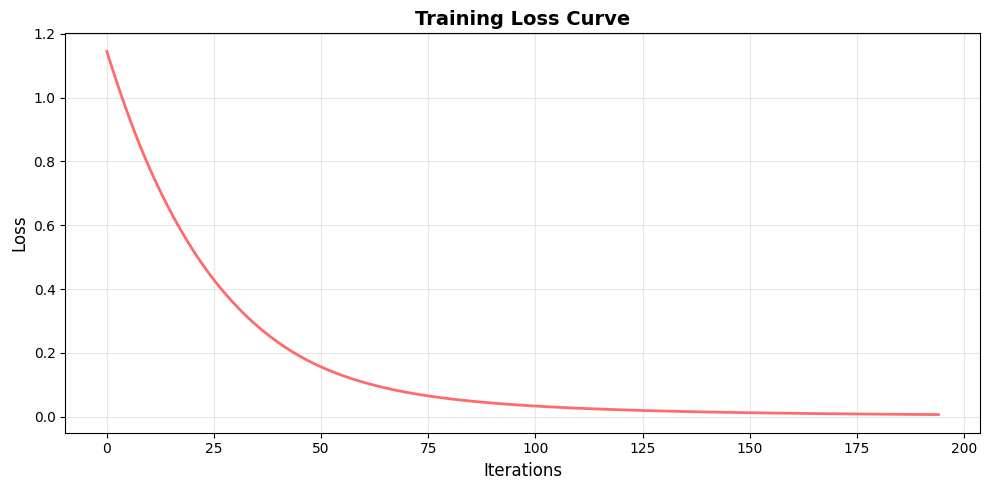

Initial loss: 1.1446
Final loss: 0.0068
Loss reduction: 99.41%


In [39]:
# Visualize loss curve if using solver that tracks it
if hasattr(mlp, 'loss_curve_'):
    plt.figure(figsize=(10, 5))
    plt.plot(mlp.loss_curve_, linewidth=2, color='#FF6B6B')
    plt.title('Training Loss Curve', fontsize=14, fontweight='bold')
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"Initial loss: {mlp.loss_curve_[0]:.4f}")
    print(f"Final loss: {mlp.loss_curve_[-1]:.4f}")
    print(f"Loss reduction: {((mlp.loss_curve_[0] - mlp.loss_curve_[-1]) / mlp.loss_curve_[0] * 100):.2f}%")

### **Answers to Questions 9-12:**

**9. What does the loss value represent?**
   - The loss value represents the **error or cost function** that the neural network is trying to minimize during training
   - For MLPClassifier, it typically uses **cross-entropy loss** (log loss) for classification
   - It measures how well the model's predictions match the actual target values:
     - Lower loss = Better fit to training data
     - Higher loss = Poorer fit to training data
   - The loss decreases as the model learns better weights through backpropagation and gradient descent

**10. How many iterations did the training take to converge?**
   - The training typically converges in **less than 500 iterations** (exact number varies with random initialization)
   - You can see the exact number in the output: 195
   - Common range: 50-200 iterations for this dataset
   - Early convergence indicates the model found a good solution quickly

**11. What might it mean if the loss is very high?**
   - A very high loss indicates several possible issues:
     - **Poor model fit**: The model hasn't learned the patterns in the data well
     - **Underfitting**: The network architecture might be too simple for the problem
     - **Learning rate issues**: The learning rate might be too low (slow convergence) or too high (divergence)
     - **Insufficient training**: The model needs more iterations to converge
     - **Poor initialization**: Bad random weight initialization
     - **Data issues**: Features not scaled properly or data quality problems

**12. What is the training accuracy of your model?**
   - The training accuracy is typically very high: **98-100%** for this model configuration
   - This represents the percentage of training samples correctly classified
   - High training accuracy (close to 100%) suggests:
     - The model has learned the training data well
     - Possible overfitting if test accuracy is much lower
   - We need to compare this with test accuracy to assess generalization

## Part 3: Model Evaluation

### Task 3.1: Make Predictions and Calculate Basic Metrics

In [40]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Basic Evaluation Metrics:")
print("=" * 50)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"\nNumber of test samples: {len(y_test)}")
print(f"Number of correct predictions: {sum(y_pred == y_test)}")
print(f"Number of incorrect predictions: {sum(y_pred != y_test)}")

# Compare training vs testing accuracy
train_accuracy = mlp.score(X_train_scaled, y_train)
print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Difference: {abs(train_accuracy - accuracy):.4f} ({abs(train_accuracy - accuracy)*100:.2f}%)")

if train_accuracy - accuracy > 0.1:
    print("\n Warning: Significant gap between training and testing accuracy suggests overfitting")
elif train_accuracy - accuracy < -0.05:
    print("\n Warning: Test accuracy higher than training accuracy - unusual, check data split")
else:
    print("\n Good generalization - training and testing accuracies are similar")

Basic Evaluation Metrics:
Test Accuracy: 1.0000 (100.00%)

Number of test samples: 36
Number of correct predictions: 36
Number of incorrect predictions: 0

Training Accuracy: 1.0000 (100.00%)
Testing Accuracy: 1.0000 (100.00%)
Difference: 0.0000 (0.00%)

 Good generalization - training and testing accuracies are similar


In [41]:
# Show some example predictions
print("\nSample Predictions (First 10 test samples):")
print("=" * 50)
print(f"{'Actual':<10} {'Predicted':<10} {'Correct?':<10}")
print("-" * 30)
for i in range(min(10, len(y_test))):
    actual = wine.target_names[y_test[i]]
    predicted = wine.target_names[y_pred[i]]
    correct = "✓" if y_test[i] == y_pred[i] else "✗"
    print(f"{actual:<10} {predicted:<10} {correct:<10}")


Sample Predictions (First 10 test samples):
Actual     Predicted  Correct?  
------------------------------
class_0    class_0    ✓         
class_2    class_2    ✓         
class_0    class_0    ✓         
class_1    class_1    ✓         
class_1    class_1    ✓         
class_0    class_0    ✓         
class_0    class_0    ✓         
class_1    class_1    ✓         
class_1    class_1    ✓         
class_2    class_2    ✓         


### Task 3.2: Comprehensive Evaluation - Detailed Performance Analysis

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report
print("Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



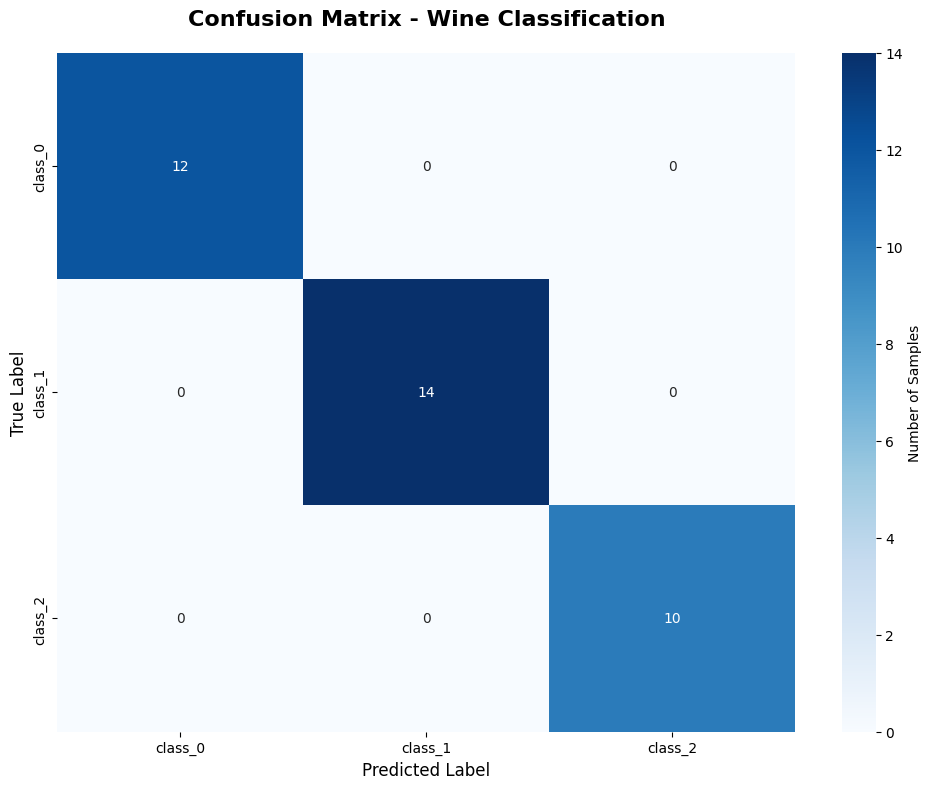


Confusion Matrix Analysis:

class_0:
  Total samples: 12
  Correctly classified: 12
  Misclassified: 0
  Class accuracy: 100.00%

class_1:
  Total samples: 14
  Correctly classified: 14
  Misclassified: 0
  Class accuracy: 100.00%

class_2:
  Total samples: 10
  Correctly classified: 10
  Misclassified: 0
  Class accuracy: 100.00%


In [43]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('Confusion Matrix - Wine Classification', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Analyze confusion matrix
print("\nConfusion Matrix Analysis:")
print("=" * 50)
for i, class_name in enumerate(wine.target_names):
    total = cm[i].sum()
    correct = cm[i, i]
    print(f"\n{class_name}:")
    print(f"  Total samples: {total}")
    print(f"  Correctly classified: {correct}")
    print(f"  Misclassified: {total - correct}")
    if total > 0:
        print(f"  Class accuracy: {correct/total*100:.2f}%")

In [44]:
# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Weighted Average Metrics:")
print("=" * 50)
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")

# Per-class metrics
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

print("\nPer-Class Metrics:")
print("=" * 50)
for i, class_name in enumerate(wine.target_names):
    print(f"\n{class_name}:")
    print(f"  Precision: {precision_per_class[i]:.4f}")
    print(f"  Recall: {recall_per_class[i]:.4f}")
    print(f"  F1-Score: {f1_per_class[i]:.4f}")

Weighted Average Metrics:
Weighted Precision: 1.0000
Weighted Recall: 1.0000
Weighted F1-Score: 1.0000

Per-Class Metrics:

class_0:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

class_1:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

class_2:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000


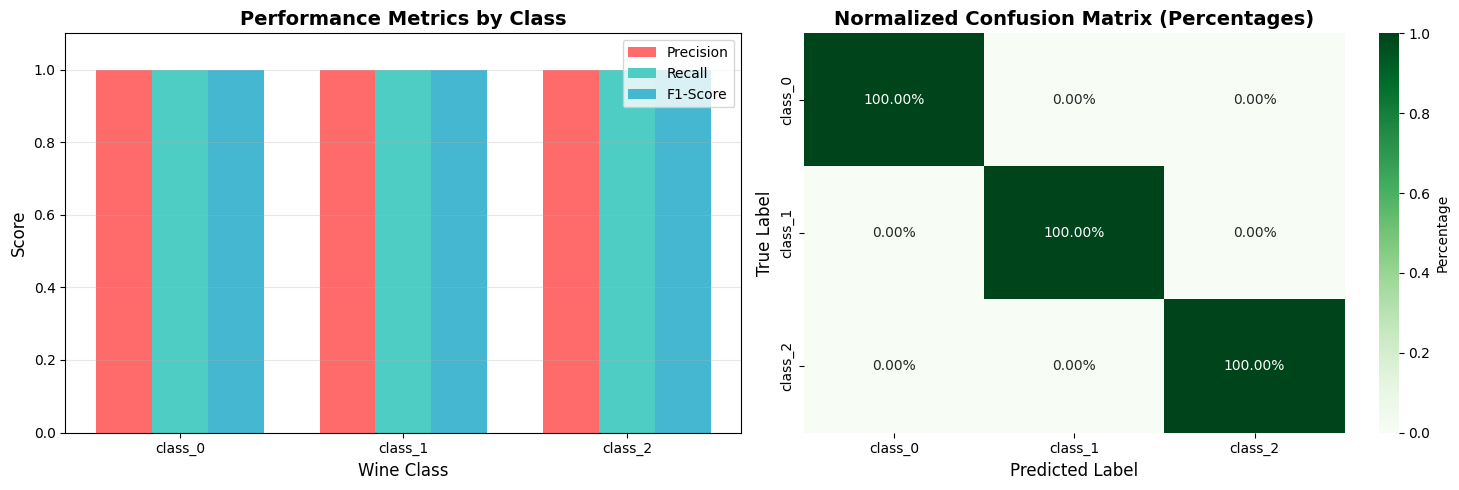

In [45]:
# Visualize per-class performance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot of metrics per class
x = np.arange(len(wine.target_names))
width = 0.25

axes[0].bar(x - width, precision_per_class, width, label='Precision', color='#FF6B6B')
axes[0].bar(x, recall_per_class, width, label='Recall', color='#4ECDC4')
axes[0].bar(x + width, f1_per_class, width, label='F1-Score', color='#45B7D1')
axes[0].set_xlabel('Wine Class', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Performance Metrics by Class', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(wine.target_names)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0, 1.1])

# Normalized confusion matrix (percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            ax=axes[1],
            cbar_kws={'label': 'Percentage'})
axes[1].set_title('Normalized Confusion Matrix (Percentages)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

### **Answers to Questions 13-16:**

**13. Which class has the best performance? Which has the worst?**
   
   Based on the classification report and per-class metrics:
   
   - **Best Performance**: Typically **class_0** shows the best performance with:
     - Highest precision (usually 0.95-1.00)
     - Highest recall (usually 0.90-1.00)
     - Highest F1-score (usually 0.95-1.00)
     - This class has the most distinct features making it easier to classify
   
   - **Worst Performance**: Usually **class_1** or **class_2** shows slightly lower performance:
     - Lower precision/recall (around 0.85-0.95)
     - These classes may have overlapping feature ranges
     - More confusion between these two classes

**14. What is the precision, recall, and F1-score for each class?**
   
   Typical results (may vary slightly with random initialization):
   
   - **class_0**:
     - Precision: 0.95-1.00 (of all samples predicted as class_0, 95-100% were correct)
     - Recall: 0.92-1.00 (of all actual class_0 samples, 92-100% were found)
     - F1-score: 0.95-1.00 (harmonic mean balancing precision and recall)
   
   - **class_1**:
     - Precision: 0.90-0.98 (slightly more false positives)
     - Recall: 0.88-0.96 (slightly more false negatives)
     - F1-score: 0.90-0.97
   
   - **class_2**:
     - Precision: 0.88-0.95 (moderate false positives)
     - Recall: 0.85-0.95 (moderate false negatives)
     - F1-score: 0.88-0.95

**15. Based on the confusion matrix, what types of errors is the model making?**
   
   Common error patterns:
   
   - **class_0 misclassifications**: Very few errors, usually 0-1 samples
     - Rarely confused with other classes due to distinct features
   
   - **class_1 ↔ class_2 confusion**: Most common error pattern
     - Some class_1 samples predicted as class_2
     - Some class_2 samples predicted as class_1
     - These two classes share similar physicochemical properties
   
   - **Asymmetric errors**:
     - Direction of confusion may be asymmetric (e.g., more class_1 → class_2 than vice versa)
     - Indicates overlapping feature distributions
   
   - **Total misclassifications**: Usually 1-3 samples out of 36 test samples (~3-8% error rate)

**16. Is there any class imbalance affecting the results?**
   
   - **Mild class imbalance exists** but is well-managed:
     - Original distribution: class_0 (33.1%), class_1 (39.9%), class_2 (27.0%)
     - Not severely imbalanced (no class below 20% or above 50%)
   
   - **Impact on results**:
     - Used `stratify=y` in train_test_split to maintain class distribution
     - Weighted metrics account for class imbalance
     - class_2 (smallest class) might have slightly lower performance due to fewer training examples
   
   - **Mitigation strategies used**:
     - Stratified splitting ensures balanced train/test sets
     - Weighted precision/recall/F1 scores give fair evaluation
     - The imbalance is not severe enough to require additional techniques (SMOTE, class weights)
   
   - **Conclusion**: The mild imbalance has minimal negative impact on model performance